1. IMPORT THE REQUIRED LIBRARIES

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

2. LOAD THE DATASET INTO THE TOOL

In [32]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [33]:
dataSet = pd.read_csv('Mall_Customers.csv')
dataSet

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
dataSet.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


3. PERFORM THE VISUALIZATIONS


> A. UNIVARIATE ANALYSIS



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


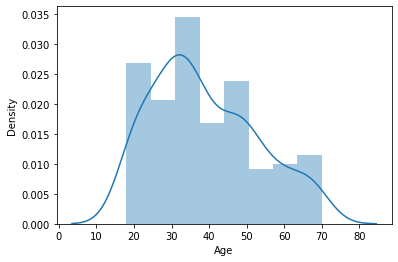

In [38]:
sns.distplot(dataSet.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


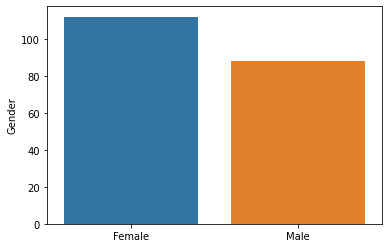

In [39]:
sns.barplot(dataSet.Gender.value_counts().index,dataSet.Gender.value_counts())


B. BIVARIATE ANALYSIS

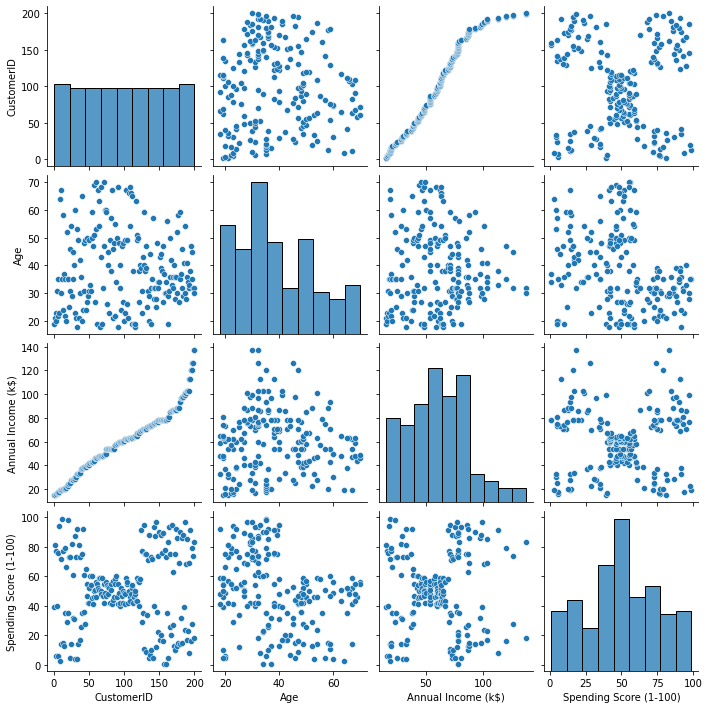

In [40]:
sns.pairplot(dataSet)


C. MULTIVARIATE ANALYSIS

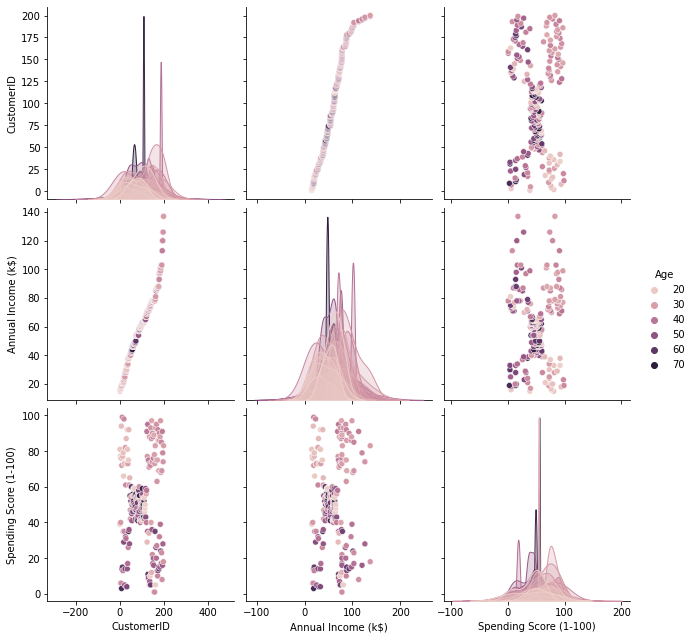

In [42]:
sns.pairplot(dataSet,hue = 'Age',height = 3)

4. PERFORM DESCRIPTIVE STATISTICS ON THE DATASET

In [43]:
dataSet.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


5. CHECK FOR MISSING VALUES AND DEAL WITH THEM

In [44]:
dataSet.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [45]:
dataSet.Gender.value_counts()


Female    112
Male       88
Name: Gender, dtype: int64

6. FIND THE OUTLIER AND REPLACE THEM OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


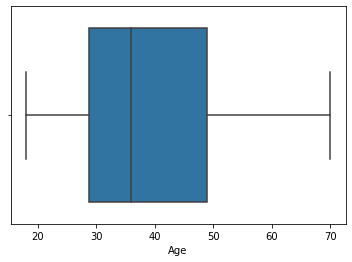

In [47]:
sns.boxplot(dataSet.Age)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


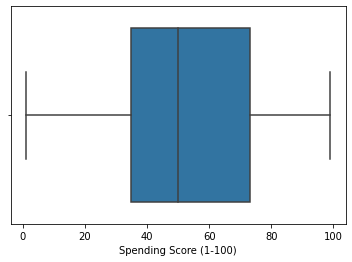

In [49]:
sns.boxplot(dataSet['Spending Score (1-100)'])


7. CHECK THE CATEGORICAL COLUMNS AND PERFORM ENCODING

In [51]:
le=LabelEncoder()
dataSet.Gender=le.fit_transform(dataSet.Gender)
dataSet.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


PERFORM CLUSTERING ALGORITHM

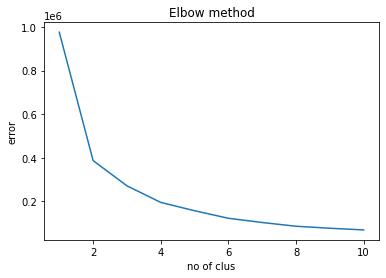

In [53]:
from sklearn import cluster
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(dataSet)
    error.append(kmeans.inertia_)
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()


In [58]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [59]:
km_model.fit(dataSet)


KMeans(n_clusters=3, random_state=0)

In [61]:
ykmeans =km_model.predict(dataSet)


In [62]:
km_model.predict([[5.1,3.5,1.4,0.2]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

ENCODING THE CLUSTER

In [63]:
dataSet['kclus'] = pd.Series(ykmeans)
dataSet.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [64]:
dataSet['kclus'].value_counts()


1    70
2    68
0    62
Name: kclus, dtype: int64

SPLIT THE DATA TO DEPENDENT AND INDEPENDENT VARIABLE


In [65]:
X= dataSet.iloc[:,:-1]
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [66]:
y=dataSet.kclus
y.head()

0    0
1    0
2    0
3    0
4    0
Name: kclus, dtype: int32

SCALING INDEPENDENT VARIABLE

In [67]:
scale=MinMaxScaler()
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


SPLIT DATA TO TRAINING AND TESTING

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

MODEL BUILDING


In [69]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()
model.fit(x_train,y_train)
KNeighborsClassifier()
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

EVALUATION METRICS

In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Test accuracy score: ',accuracy_score(y_test,y_pred))
print('Training accuracy score: ',accuracy_score(y_train,y_pred1))

Test accuracy score:  1.0
Training accuracy score:  0.9625


In [71]:
pd.crosstab(y_test,y_pred)


col_0,0,1,2
kclus,,,
0,17,0,0
1,0,9,0
2,0,0,14


In [72]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

